3 observable trends;

1) When comparing latitude to maximum temperature we see that the highest temperatures range in the 0-40 latitudes. This makes sense as we would expect higher temperatures to be located around the equator as the angle of the sun’s radiation will be closer to 90 degrees. This angle of incidence will impact the heat exposure to a region and as we move farther away from the equator. As the angle of incidence declines temperatures will tend to be lower. In this case the concentration of high temperatures in the 0-40 range can also be explained by diurnal variation. During this particular time of year we are coming out of summer and certain portions of the northern hemisphere will be experiencing longer days. Longer days in relation to other regions will increase the likely-hood of higher maximum temperatures recorded.

2) No correlation to be found with windspeed. However there is a frequency to be noted with windspeed. The majority of windspeed data is found between the 0-15 mph range with little data above those speeds. This may be a result of data being gathered in cities and cities with their large structures could be reducing or altering wind speed data. This may also be a result of measure windspeed closer to the surface as opposed to higher altitudes. This would be especially impactful if measuring wind data low to the ground inside a major city with large buildings or terrain alterations. Climate change at large may be changing the way are air circulates around the planet with manmade heat creating dispersions of wind. Or our instruments are simply outdated and producing inaccurate results.

3) No significant correlation found with cloudiness. Humidity data seems to be more concentrated at the 60 - 100% range. This is explainable by the fact that we are coming out of the summer solstice and during high temperatures there will naturally be more moisture in the air. That along with continuous general increases in global temperature will evaporate more existing water sources and increase humidity. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#for current date
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

In [4]:
# Request and set count for printing results 
request_count = 0 
set_count = 1

# Columns for weather data
final_cities_list = []
country_list = []
lats = []
lons = []
dates =[]
humidities = []
clouds = []
winds = []
max_temps = []

# Loop through cities list and make requests
for city in cities:
    try:
        city_search = city.replace(' ','%20')
        #country = city[1]
        url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + '&q=' + city_search 
        response = requests.get(url).json()
        request_count += 1
        print('Processing record %s of set %s| %s' % (request_count, set_count, city))
        print(url)
        
        final_cities_list.append(city)
        country_list.append(response['sys']['country'])
        lats.append(response['coord']['lat'])
        lons.append(response['coord']['lat'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        max_temps.append(response['main']['temp_max'])
        
    except:
        print("City not found. Skipping...")
        final_cities_list.remove(city)
        
    if request_count == 50:
        request_count = 0
        set_count += 1

Processing record 1 of set 1| asyut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=asyut
Processing record 2 of set 1| najran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=najran
Processing record 3 of set 1| puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=puerto%20ayora
Processing record 4 of set 1| port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=port%20alfred
Processing record 5 of set 1| taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=taolanaro
City not found. Skipping...
Processing record 6 of set 1| ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=ostrovnoy
Processing record 7 of set 1| pavlivka
http://api.open

Processing record 5 of set 2| berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=berlevag
Processing record 6 of set 2| broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=broome
Processing record 7 of set 2| tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=tuatapere
Processing record 8 of set 2| nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=nanortalik
Processing record 9 of set 2| illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=illoqqortoormiut
City not found. Skipping...
Processing record 10 of set 2| faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=faanui
Processing record 11 of set 2| bundaberg
http://api

Processing record 8 of set 3| chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=chokurdakh
Processing record 9 of set 3| tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=tromso
Processing record 10 of set 3| porto belo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=porto%20belo
Processing record 11 of set 3| yeniseysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=yeniseysk
Processing record 12 of set 3| nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=nizhneyansk
City not found. Skipping...
Processing record 13 of set 3| torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=torbay
Processing record 14 of set 3| kuche
http://api.open

Processing record 11 of set 4| katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=katsuura
Processing record 12 of set 4| skjervoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=skjervoy
Processing record 13 of set 4| new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=new%20norfolk
Processing record 14 of set 4| saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=saskylakh
Processing record 15 of set 4| karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=karratha
Processing record 16 of set 4| deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=deputatskiy
Processing record 17 of set 4| coahuayana
http://api.openweathermap.org/

Processing record 15 of set 5| mto wa mbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=mto%20wa%20mbu
Processing record 16 of set 5| vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=vardo
Processing record 17 of set 5| rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=rawson
Processing record 18 of set 5| ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=ancud
Processing record 19 of set 5| narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=narsaq
Processing record 20 of set 5| ocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=ocos
Processing record 21 of set 5| constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing record 20 of set 6| palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=palabuhanratu
City not found. Skipping...
Processing record 21 of set 6| puerto escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=puerto%20escondido
Processing record 22 of set 6| morgan city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=morgan%20city
Processing record 23 of set 6| sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=sambava
Processing record 24 of set 6| sergokala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=sergokala
Processing record 25 of set 6| balabac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=balabac
Processing record 26 of se

Processing record 23 of set 7| cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=cidreira
Processing record 24 of set 7| kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=kaitangata
Processing record 25 of set 7| eidfjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=eidfjord
Processing record 26 of set 7| coulihaut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=coulihaut
City not found. Skipping...
Processing record 27 of set 7| williston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=williston
Processing record 28 of set 7| pachino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=pachino
Processing record 29 of set 7| sisophon
http://api.ope

Processing record 25 of set 8| sorvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=sorvag
City not found. Skipping...
Processing record 26 of set 8| rio grande city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=rio%20grande%20city
Processing record 27 of set 8| koumac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=koumac
Processing record 28 of set 8| avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=avera
Processing record 29 of set 8| sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=sorong
Processing record 30 of set 8| angoche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=angoche
Processing record 31 of set 8| lavras
http://api.openweatherma

Processing record 28 of set 9| yunhe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=yunhe
Processing record 29 of set 9| huanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=huanan
Processing record 30 of set 9| koungou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=koungou
City not found. Skipping...
Processing record 31 of set 9| burica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=burica
City not found. Skipping...
Processing record 32 of set 9| langsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=langsa
Processing record 33 of set 9| comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=comodoro%20rivadavia
Processing record 34 of set 9|

Processing record 31 of set 10| alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=alice%20springs
Processing record 32 of set 10| khandbari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=khandbari
Processing record 33 of set 10| oyek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=oyek
Processing record 34 of set 10| codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=codrington
Processing record 35 of set 10| songkhla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=songkhla
Processing record 36 of set 10| paragould
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=paragould
Processing record 37 of set 10| cherskiy
http://api.openweathermap.org

Processing record 35 of set 11| palencia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=palencia
Processing record 36 of set 11| nizhniy kuranakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=nizhniy%20kuranakh
Processing record 37 of set 11| camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=camacha
Processing record 38 of set 11| rio grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=rio%20grande
Processing record 39 of set 11| warqla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=warqla
City not found. Skipping...
Processing record 40 of set 11| carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea22d09c49ce4e8d54261e49b831e511&q=carutapera
Processing record 41 of set 11| 

In [11]:
# Store stored values into dictioary
weather_dict = {
    "city": final_cities_list,
    "country": country_list,
    "lat": lats,
    "lon": lons,
    "date": dates,
    "humidity": humidities,
    "clouds": clouds,
    "wind": winds,
    "max_temp": max_temps
}   

# Create Data frame out of dictionary
weather_data = pd.DataFrame(weather_dict)

# Export to csv
weather_data.to_csv(output_data_file)

# Display
weather_data.head()

,city,country,lat,lon,date,humidity,clouds,wind,max_temp
0,asyut,EG,27.18,27.18,1535216400,46,0,13.87,93.20
1,najran,SA,17.54,17.54,1535216400,13,40,4.70,95.00
2,puerto ayora,EC,-0.74,-0.74,1535216400,65,75,17.22,77.00
3,port alfred,ZA,-33.59,-33.59,1535219917,98,0,5.73,62.95
4,ostrovnoy,RU,68.05,68.05,1535219917,65,56,24.18,64.48


In [6]:
# Determing current date of pull 
d = datetime.now()
only_date = d.date()
converted_date = only_date.strftime('%m/%d/%Y')
print(converted_date)

08/25/2018


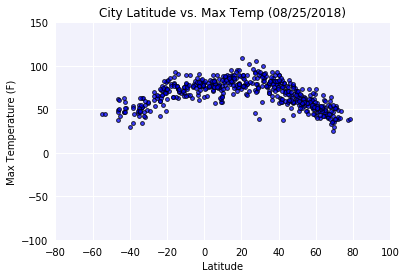

In [7]:
# City Latitude vs. Max Temp Scatter Plot
y_values = weather_data['max_temp']
x_values = weather_data['lat']
from datetime import datetime
date = datetime.now()

# Set grid appearance
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('lavender')
ax.patch.set_alpha(0.5)
ax.set_axisbelow(True)
ax.yaxis.grid(linestyle='-', linewidth='1', color='white')
ax.xaxis.grid(linestyle='-', linewidth='1', color='white')

# Remove border and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(color="white")

# Plot parameters
plt.title("City Latitude vs. Max Temp" ' ('+ converted_date +')')
plt.ylim(-100, 150)
plt.xlim(-80, 100)
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.scatter(x_values, y_values, color = "blue", edgecolors ="black", s = 15, alpha = 0.75, linewidth = 1)
plt.savefig("output_data/City_Latitude_vs_Max_Temp.png",facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

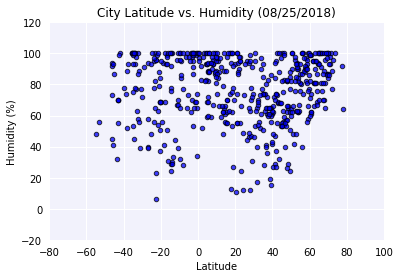

In [8]:
# City Latitude vs. Humidity Scatter Plot
y_values = weather_data['humidity']
x_values = weather_data['lat']

# Set grid appearance 
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('lavender')
ax.patch.set_alpha(0.5)
ax.set_axisbelow(True)
ax.yaxis.grid(linestyle='-', linewidth='1', color='white')
ax.xaxis.grid(linestyle='-', linewidth='1', color='white')

# Remove border and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(color="white")

# Plot parameters
plt.title("City Latitude vs. Humidity" ' ('+ converted_date +')')
plt.ylim(-20, 120)
plt.xlim(-80, 100)
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.scatter(x_values, y_values,color = "blue", edgecolors ="black", s = 20, alpha = 0.75, linewidth = 1)
plt.savefig("output_data/City_Latitude_vs_Humidity.png",facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

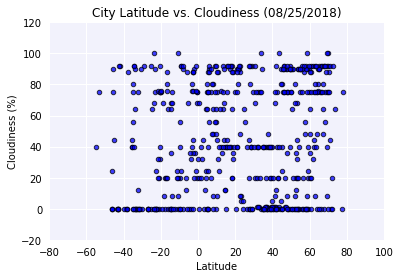

In [9]:
# City Latitude vs. Cloudiness Scatter Plot
y_values = weather_data['clouds']
x_values = weather_data['lat']

# Set grid appearance 
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('lavender')
ax.patch.set_alpha(0.5)
ax.set_axisbelow(True)
ax.yaxis.grid(linestyle='-', linewidth='1', color='white')
ax.xaxis.grid(linestyle='-', linewidth='1', color='white')

# Remove border and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(color="white")

# Plot parameters
plt.title("City Latitude vs. Cloudiness" ' ('+ converted_date +')')
plt.ylim(-20, 120)
plt.xlim(-80, 100)
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.scatter(x_values, y_values,color = "blue", edgecolors ="black", s = 20, alpha = 0.75, linewidth = 1)
plt.savefig("output_data/City_Latitude_vs_Cloudiness.png",facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

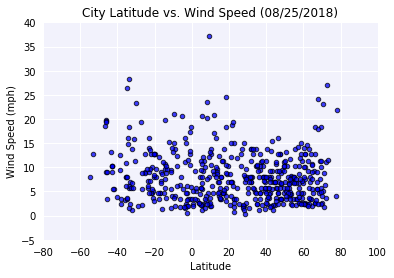

In [10]:
# City Latitude vs. Wind Speed Scatter Plot
y_values = weather_data['wind']
x_values = weather_data['lat']

# Set grid appearance 
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('lavender')
ax.patch.set_alpha(0.5)
ax.set_axisbelow(True)
ax.yaxis.grid(linestyle='-', linewidth='1', color='white')
ax.xaxis.grid(linestyle='-', linewidth='1', color='white')

# Remove border and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(color="white")

# Plot parameters
plt.title("City Latitude vs. Wind Speed" ' ('+ converted_date +')')
plt.ylim(-5, 40) 
plt.xlim(-80, 100)
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_values, y_values, color = "blue", edgecolors ="black", s = 20, alpha = 0.75, linewidth = 1)
plt.savefig("output_data/City_Latitude_vs_Wind.png",facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()